# VS_Project

In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
import os
import csv
import json
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# # Import API key
# from api_keys import weather_api_key

# File to Load
NYC_Weather_csv = "NYC 2014 July Weather Clean.csv"
NYC_Uber_csv = "uber-raw-data-jul14-clean.csv"

# Creating Dataframes
NYC_Weather = pd.read_csv(NYC_Weather_csv)
NYC_Uber = pd.read_csv(NYC_Uber_csv)

In [3]:
# Display Weather Dataframe & Rename Column
NYC_Weather = NYC_Weather.rename(columns={"Jul":"Day"})

NYC_Weather.head()

,Day,Max Temperature (° F),Avg Temperature (° F),Min Temperature (° F),Max Dew Point (° F),Avg Dew Point (° F),Min Dew Point (° F),Max Humidity (%),Avg Humidity (%),Min Humidity (%),Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (Hg),Avg Pressure (Hg),Min Pressure (Hg),Precipitation (in),Max Temperature (° C),Avg Temperature (° C),Min Temperature (° C)
0,1,87,80.3,73,70,66.9,62,81,64.2,55,20,12.0,7,29.9,29.9,29.8,0.00,30.555556,26.833333,22.777778
1,2,90,78.8,73,72,70.2,66,94,75.8,52,22,10.4,0,29.9,29.9,29.8,0.00,32.222222,26.000000,22.777778
2,3,88,78.1,70,72,70.0,66,91,76.9,58,26,8.4,0,30.0,29.9,29.9,0.65,31.111111,25.611111,21.111111
3,4,74,69.9,66,68,62.3,51,94,77.8,57,22,12.3,0,30.0,29.9,29.9,0.71,23.333333,21.055556,18.888889
4,5,82,74.0,65,51,49.3,46,58,43.0,30,21,14.0,9,30.1,30.1,30.0,0.16,27.777778,23.333333,18.333333


In [4]:
# Display UberPickups Dataframe & Delete Columns

NYC_Uber.head()

,Date/Time,Day,Month,Year,Hour,Min,Weekday,Lat,Lon,Base
0,7/01/2014 0:03,1,7,2014,12,3,2,40.7586,-73.9706,B02512
1,7/01/2014 0:05,1,7,2014,12,5,2,40.7605,-73.9994,B02512
2,7/01/2014 0:06,1,7,2014,12,6,2,40.7320,-73.9999,B02512
3,7/01/2014 0:09,1,7,2014,12,9,2,40.7635,-73.9793,B02512
4,7/01/2014 0:20,1,7,2014,12,20,2,40.7204,-74.0047,B02512


In [5]:
# Merge Weather & UberPickups Dataframes 
NYC_Uber_Weather = pd.merge(NYC_Uber, NYC_Weather, how="outer", on=["Day"])
NYC_Uber_Weather.head()

,Date/Time,Day,Month,Year,Hour,Min,Weekday,Lat,Lon,Base,...,Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (Hg),Avg Pressure (Hg),Min Pressure (Hg),Precipitation (in),Max Temperature (° C),Avg Temperature (° C),Min Temperature (° C)
0,7/01/2014 0:03,1,7,2014,12,3,2,40.7586,-73.9706,B02512,...,20.0,12.0,7.0,29.9,29.9,29.8,0.0,30.555556,26.833333,22.777778
1,7/01/2014 0:05,1,7,2014,12,5,2,40.7605,-73.9994,B02512,...,20.0,12.0,7.0,29.9,29.9,29.8,0.0,30.555556,26.833333,22.777778
2,7/01/2014 0:06,1,7,2014,12,6,2,40.7320,-73.9999,B02512,...,20.0,12.0,7.0,29.9,29.9,29.8,0.0,30.555556,26.833333,22.777778
3,7/01/2014 0:09,1,7,2014,12,9,2,40.7635,-73.9793,B02512,...,20.0,12.0,7.0,29.9,29.9,29.8,0.0,30.555556,26.833333,22.777778
4,7/01/2014 0:20,1,7,2014,12,20,2,40.7204,-74.0047,B02512,...,20.0,12.0,7.0,29.9,29.9,29.8,0.0,30.555556,26.833333,22.777778


In [6]:
# Merge Weather & UberPickups Dataframes Counted by Day
NYC_Uber_Weather_Grouped_Count = NYC_Uber_Weather.groupby("Day").count()

# Drop null rows 
NYC_Uber_Weather_Grouped_Count.drop(labels=[64,67,70,73,76,79,82,85,88,91,95,98],axis=0,inplace=True)

NYC_Uber_Weather_Grouped_Count.head()

,Date/Time,Month,Year,Hour,Min,Weekday,Lat,Lon,Base,Max Temperature (° F),...,Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (Hg),Avg Pressure (Hg),Min Pressure (Hg),Precipitation (in),Max Temperature (° C),Avg Temperature (° C),Min Temperature (° C)
Day,,,,,,,,,,,,,,,,,,,,,
1,1020,1020,1020,1020,1020,1020,1020,1020,1020,1020,...,1020,1020,1020,1020,1020,1020,1020,1020,1020,1020
2,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,...,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265
3,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,...,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014
4,547,547,547,547,547,547,547,547,547,547,...,547,547,547,547,547,547,547,547,547,547
5,397,397,397,397,397,397,397,397,397,397,...,397,397,397,397,397,397,397,397,397,397


In [7]:
# Reset Index
NYC_Uber_Weather_Grouped_Count_SetIndex = NYC_Uber_Weather_Grouped_Count.reset_index()
NYC_Uber_Weather_Grouped_Count_SetIndex.head()

,Day,Date/Time,Month,Year,Hour,Min,Weekday,Lat,Lon,Base,...,Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (Hg),Avg Pressure (Hg),Min Pressure (Hg),Precipitation (in),Max Temperature (° C),Avg Temperature (° C),Min Temperature (° C)
0,1,1020,1020,1020,1020,1020,1020,1020,1020,1020,...,1020,1020,1020,1020,1020,1020,1020,1020,1020,1020
1,2,1265,1265,1265,1265,1265,1265,1265,1265,1265,...,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265
2,3,1014,1014,1014,1014,1014,1014,1014,1014,1014,...,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014
3,4,547,547,547,547,547,547,547,547,547,...,547,547,547,547,547,547,547,547,547,547
4,5,397,397,397,397,397,397,397,397,397,...,397,397,397,397,397,397,397,397,397,397


In [8]:
NYC_Uber_Weather_Grouped_Count_SetIndex["Year"].describe()
# NYC_Uber_Weather_Grouped_Count_SetIndex["Year"].min()

count       31.000000
mean     17579.612903
std      13789.876844
min        397.000000
25%       1226.500000
50%      23578.000000
75%      29444.500000
max      34073.000000
Name: Year, dtype: float64

In [9]:
print("An observation from table statistics identifies the impact of a the Fourth of July Public Holiday, having the lowest uber pickups in the month")

An observation from table statistics identifies the impact of a the Fourth of July Public Holiday, having the lowest uber pickups in the month


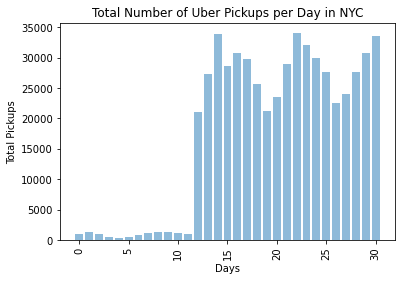

The below graph observes the impact of summer holidays due to the significant surge or uplift of uber pickups
It can also be observed that there is a wave trend of certain days of the week having higher number of uber pickups


In [10]:
# Created a bar plot showing the total number of uber pickups per day over 1 Month in NYC using pyplot.
x_axis = NYC_Uber_Weather_Grouped_Count_SetIndex.index
y_axis = NYC_Uber_Weather_Grouped_Count_SetIndex["Year"].values

plt.bar(x_axis, y_axis, align="center", alpha=0.5)
plt.xticks(rotation="vertical")

plt.title("Total Number of Uber Pickups per Day in NYC")
plt.xlabel("Days")
plt.ylabel("Total Pickups")

plt.show()

print("The below graph observes the impact of summer holidays due to the significant surge or uplift of uber pickups")
print("It can also be observed that there is a wave trend of certain days of the week having higher number of uber pickups")

In [11]:
# Merge Weather & UberPickups Dataframes Counted by Weekday
NYC_Uber_Weather_Grouped_WeekdayCount = NYC_Uber_Weather.groupby("Weekday").count()
# NYC_Uber_Weather_Grouped_WeekdayCount

# Reset Index
NYC_Uber_Weather_Grouped_WeekdayCount_SetIndex = NYC_Uber_Weather_Grouped_WeekdayCount.reset_index()
NYC_Uber_Weather_Grouped_WeekdayCount_SetIndex.head()

,Weekday,Date/Time,Day,Month,Year,Hour,Min,Lat,Lon,Base,...,Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (Hg),Avg Pressure (Hg),Min Pressure (Hg),Precipitation (in),Max Temperature (° C),Avg Temperature (° C),Min Temperature (° C)
0,1,150487,150487,150487,150487,150487,150487,150487,150487,150487,...,75783,75783,75783,75783,75783,75783,75783,75783,75783,75783
1,2,137454,137454,137454,137454,137454,137454,137454,137454,137454,...,92704,92704,92704,92704,92704,92704,92704,92704,92704,92704
2,3,107064,107064,107064,107064,107064,107064,107064,107064,107064,...,96051,96051,96051,96051,96051,96051,96051,96051,96051,96051
3,4,112317,112317,112317,112317,112317,112317,112317,112317,112317,...,98716,98716,98716,98716,98716,98716,98716,98716,98716,98716
4,5,140800,140800,140800,140800,140800,140800,140800,140800,140800,...,61614,61614,61614,61614,61614,61614,61614,61614,61614,61614


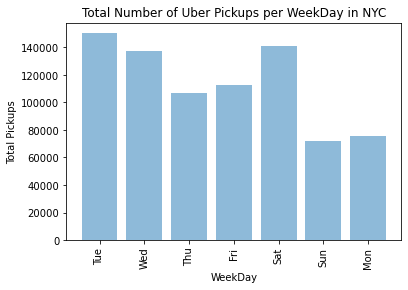

The below graph identifies the impact of the day of the week to the number of uber pickups in the month of July


In [12]:
# Created a bar plot showing the total number of uber pickups per weekday over 1 Month in NYC using pyplot.
x_axis = NYC_Uber_Weather_Grouped_WeekdayCount_SetIndex.index
y_axis = NYC_Uber_Weather_Grouped_WeekdayCount_SetIndex["Year"].values

plt.bar(x_axis, y_axis, align="center", alpha=0.5)
plt.xticks((0, 1, 2, 3, 4, 5, 6), ("Tue", "Wed", "Thu", "Fri", "Sat", "Sun", "Mon"),rotation="vertical")

plt.title("Total Number of Uber Pickups per WeekDay in NYC")
plt.xlabel("WeekDay")
plt.ylabel("Total Pickups")

plt.show()

print("The below graph identifies the impact of the day of the week to the number of uber pickups in the month of July")

In [13]:
# Attempting to normalise the data to draw strong statistical support on how the day of the week impacts number of uber pickups
NYC_Uber_Weather_Grouped_WeekdayCount_SetIndex["Year"]

0    150487
1    137454
2    107064
3    112317
4    140800
5     72192
6     75807
Name: Year, dtype: int64

In [14]:
# Normalised Weekday Count
# 5 Tuesdays/Wednesdays/Thurdays & 4 Fridays/Saturdays/Sundays/Mondays

NormalisedWeekdayCount = {"Weekday": ["Tue", "Wed", "Thu", "Fri", "Sat", "Sun", "Mon"], 
                          "Normalised Pickups": [NYC_Uber_Weather_Grouped_WeekdayCount_SetIndex["Year"][0]/5, 
                                                 NYC_Uber_Weather_Grouped_WeekdayCount_SetIndex["Year"][1]/5, 
                                                 NYC_Uber_Weather_Grouped_WeekdayCount_SetIndex["Year"][2]/5, 
                                                 NYC_Uber_Weather_Grouped_WeekdayCount_SetIndex["Year"][3]/4, 
                                                 NYC_Uber_Weather_Grouped_WeekdayCount_SetIndex["Year"][4]/4, 
                                                 NYC_Uber_Weather_Grouped_WeekdayCount_SetIndex["Year"][5]/4, 
                                                 NYC_Uber_Weather_Grouped_WeekdayCount_SetIndex["Year"][6]/4]} 

NormalisedWeekdayCount = pd.DataFrame(NormalisedWeekdayCount)

NormalisedWeekdayCount

,Weekday,Normalised Pickups
0,Tue,30097.40
1,Wed,27490.80
2,Thu,21412.80
3,Fri,28079.25
4,Sat,35200.00
5,Sun,18048.00
6,Mon,18951.75


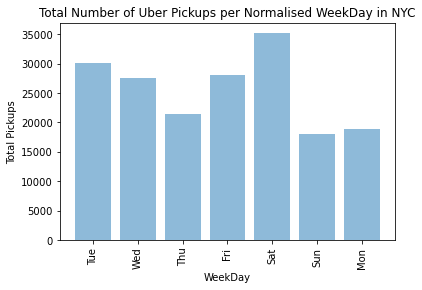

The below graph identifies the average number of uber pickups of the normalised weekdays
Given in this month there were 5 Tue/Wed/Thu & 4 Fri/Sat/Sun/Mon, the data was normalised to have the graph show the average pickups per weekday
Hence we can observe that Saturdays have the highest pickups and Sundays the lowest
Further investigation to be conducted as to why. Possible hypotheses include: 
1) Saturday Nights more people consume alcohol hence would require a ride home
2) Sundays more people don't go out, instead recover/ prepare for the work week ahead
3) Tuesdays/ Wednesdays are the second highest, and often are cheaper to travel by flight
If this last theory is possible, we would expect to see lots of pickups around the airports
Let's see if the heatmap or map marker supports this hypothesis


In [36]:
# Created a bar plot showing the total number of uber pickups per normalised weekday in NYC using pyplot.
x_axis = NormalisedWeekdayCount.index
y_axis = NormalisedWeekdayCount["Normalised Pickups"].values

plt.bar(x_axis, y_axis, align="center", alpha=0.5)
plt.xticks((0, 1, 2, 3, 4, 5, 6), ("Tue", "Wed", "Thu", "Fri", "Sat", "Sun", "Mon"),rotation="vertical")

plt.title("Total Number of Uber Pickups per Normalised WeekDay in NYC")
plt.xlabel("WeekDay")
plt.ylabel("Total Pickups")

plt.show()

print("The below graph identifies the average number of uber pickups of the normalised weekdays")
print("Given in this month there were 5 Tue/Wed/Thu & 4 Fri/Sat/Sun/Mon, the data was normalised to have the graph show the average pickups per weekday")
print("Hence we can observe that Saturdays have the highest pickups and Sundays the lowest")
print("Further investigation to be conducted as to why. Possible hypotheses include: ")
print("1) Saturday Nights more people consume alcohol hence would require a ride home")
print("2) Sundays more people don't go out, instead recover/ prepare for the work week ahead")
print("3) Tuesdays/ Wednesdays are the second highest, and often are cheaper to travel by flight")
print("If this last theory is possible, we would expect to see lots of pickups around the airports")
print("Let's see if the heatmap or map marker supports this hypothesis")


In [16]:
# Merge Weather & UberPickups Dataframes Averaged by Day
NYC_Uber_Weather_Grouped_Avg = NYC_Uber_Weather.groupby("Day").mean()

# Drop null rows 
NYC_Uber_Weather_Grouped_Avg.drop(labels=[64,67,70,73,76,79,82,85,88,91,95,98],axis=0,inplace=True)

NYC_Uber_Weather_Grouped_Avg

# Reset Index
NYC_Uber_Weather_Grouped_Avg_SetIndex = NYC_Uber_Weather_Grouped_Avg.reset_index()
NYC_Uber_Weather_Grouped_Avg_SetIndex.head()

,Day,Month,Year,Hour,Min,Weekday,Lat,Lon,Max Temperature (° F),Avg Temperature (° F),...,Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (Hg),Avg Pressure (Hg),Min Pressure (Hg),Precipitation (in),Max Temperature (° C),Avg Temperature (° C),Min Temperature (° C)
0,1,7.0,2014.0,6.572549,30.069608,2.0,40.746093,-73.984617,87.0,80.3,...,20.0,12.0,7.0,29.9,29.9,29.8,0.00,30.555556,26.833333,22.777778
1,2,7.0,2014.0,6.741502,29.250593,3.0,40.748409,-73.982662,90.0,78.8,...,22.0,10.4,0.0,29.9,29.9,29.8,0.00,32.222222,26.000000,22.777778
2,3,7.0,2014.0,6.708087,28.542406,4.0,40.745815,-73.979565,88.0,78.1,...,26.0,8.4,0.0,30.0,29.9,29.9,0.65,31.111111,25.611111,21.111111
3,4,7.0,2014.0,6.981718,29.159049,5.0,40.732388,-73.971241,74.0,69.9,...,22.0,12.3,0.0,30.0,29.9,29.9,0.71,23.333333,21.055556,18.888889
4,5,7.0,2014.0,7.073048,29.536524,6.0,40.745417,-73.967095,82.0,74.0,...,21.0,14.0,9.0,30.1,30.1,30.0,0.16,27.777778,23.333333,18.333333


In [17]:
NYC_Uber_Count = NYC_Uber_Weather_Grouped_Count_SetIndex[["Day", "Weekday"]]
NYC_Temp = NYC_Uber_Weather_Grouped_Avg_SetIndex[["Day", "Weekday", "Precipitation (in)", "Avg Temperature (° C)"]]

NYC_Uber_Temp = pd.merge(NYC_Uber_Count, NYC_Temp, how="outer", on=["Day"]).rename(columns={"Weekday_x":"Number of Pickups", 
                                                                                            "Weekday_y":"Weekday"})

NYC_Uber_Temp

,Day,Number of Pickups,Weekday,Precipitation (in),Avg Temperature (° C)
0,1,1020,2.0,0.00,26.833333
1,2,1265,3.0,0.00,26.000000
2,3,1014,4.0,0.65,25.611111
3,4,547,5.0,0.71,21.055556
4,5,397,6.0,0.16,23.333333
5,6,430,7.0,0.00,25.777778
6,7,874,1.0,0.00,28.333333
7,8,1221,2.0,0.18,27.500000
8,9,1366,3.0,0.00,26.388889
9,10,1401,4.0,0.00,24.166667


In [18]:
NYC_Uber_Temp_Summer = NYC_Uber_Temp.iloc[12:31]
NYC_Uber_Temp_Summer.head()

NYC_Uber_Temp_School = NYC_Uber_Temp.iloc[0:11]
NYC_Uber_Temp_School.head()

,Day,Number of Pickups,Weekday,Precipitation (in),Avg Temperature (° C)
0,1,1020,2.0,0.00,26.833333
1,2,1265,3.0,0.00,26.000000
2,3,1014,4.0,0.65,25.611111
3,4,547,5.0,0.71,21.055556
4,5,397,6.0,0.16,23.333333


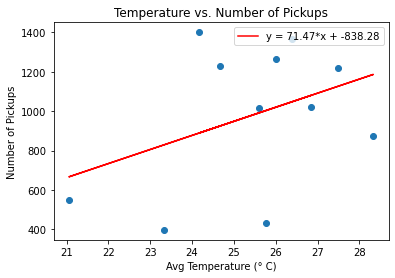

Correlation coefficient or r value = 0.394
This correlation is not statistically significant to state there is a relationship for this month between number of pickups and temperature


In [19]:
# Generate a scatter plot of Temperature vs. Number of Pickups
x_axis_temp = NYC_Uber_Temp_School["Avg Temperature (° C)"]
y_axis = NYC_Uber_Temp_School["Number of Pickups"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_temp, y_axis)
regress_values = x_axis_temp*slope + intercept

plt.scatter(x_axis_temp,y_axis)
plt.plot(x_axis_temp, regress_values, "r-", label = "y = {:.2f}*x + {:.2f}".format(slope, intercept))

plt.title("Temperature vs. Number of Pickups")
plt.xlabel("Avg Temperature (° C)")
plt.ylabel("Number of Pickups")
plt.legend()

plt.savefig("VS_Temperature_vs_Number_of_Pickups")
plt.show()

# r value = correlation coefficient 
correlation = st.pearsonr(x_axis_temp,y_axis)
print(f"Correlation coefficient or r value = {round(correlation[0],3)}")
print("This correlation is not statistically significant to state there is a relationship for this month between number of pickups and temperature")

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
# Import API key
from api_keys import g_key

# Configure gmaps with API key
gmaps.configure(api_key=g_key)

In [37]:
# Store 'Lat' and 'Lng' into  locations 
locations = NYC_Uber_Weather[["Lat", "Lon"]].astype(float)
# locations

Precipitation  = NYC_Uber_Weather["Precipitation (in)"].astype(float)
# Precipitation 

In [38]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=Precipitation, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
# Building query URL
url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
api_key = g_key
units = "metric"

# url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json" 
# places_data = requests.get(url, params=params).json()
# print(json.dumps(places_data, indent=4, sort_keys=True))

In [24]:
Landmarks_df = NYC_Uber_Weather_Grouped_Avg_SetIndex
Landmarks_df["Hotel Name"] = ""
Landmarks_df["Parking Lot"] = ""
Landmarks_df["Shopping Mall"] = ""
Landmarks_df.head()

,Day,Month,Year,Hour,Min,Weekday,Lat,Lon,Max Temperature (° F),Avg Temperature (° F),...,Max Pressure (Hg),Avg Pressure (Hg),Min Pressure (Hg),Precipitation (in),Max Temperature (° C),Avg Temperature (° C),Min Temperature (° C),Hotel Name,Parking Lot,Shopping Mall
0,1,7.0,2014.0,6.572549,30.069608,2.0,40.746093,-73.984617,87.0,80.3,...,29.9,29.9,29.8,0.00,30.555556,26.833333,22.777778,,,
1,2,7.0,2014.0,6.741502,29.250593,3.0,40.748409,-73.982662,90.0,78.8,...,29.9,29.9,29.8,0.00,32.222222,26.000000,22.777778,,,
2,3,7.0,2014.0,6.708087,28.542406,4.0,40.745815,-73.979565,88.0,78.1,...,30.0,29.9,29.9,0.65,31.111111,25.611111,21.111111,,,
3,4,7.0,2014.0,6.981718,29.159049,5.0,40.732388,-73.971241,74.0,69.9,...,30.0,29.9,29.9,0.71,23.333333,21.055556,18.888889,,,
4,5,7.0,2014.0,7.073048,29.536524,6.0,40.745417,-73.967095,82.0,74.0,...,30.1,30.1,30.0,0.16,27.777778,23.333333,18.333333,,,


In [25]:
# Use Google Places API to find the first hotel, parking lot, shopping mall for each days' average or epiccenter location within 5,000 meters
for index, row in Landmarks_df.iterrows():
    try:
        url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

        params = {"location": "location", 
                  "keyword": "hotel",
#                   "keyword": "parking",
#                   "keyword": "shopping_mall",
                  "radius": 5000, 
                  "key": g_key}


        Latitude = row["Lat"]
        Longitude = row["Lon"]

        params["location"] = f"{Latitude}, {Longitude}"

        Landmarks_data = requests.get(url, params=params).json()
        
        Landmarks_df.loc[index, "Hotel Name"] = Landmarks_data["results"][0]["name"]
#         Landmarks_df.loc[index, "Parking Lot"] = Landmarks_data["results"][0]["name"]
#         Landmarks_df.loc[index, "Shopping Mall"] = Landmarks_data["results"][0]["name"]
        
    except IndexError:
        
        Landmarks_df.loc[index, "Hotel Name"] = "NaN"
#         Landmarks_df.loc[index, "Parking Lot"] = "NaN"
#         Landmarks_df.loc[index, "Shopping Mall"] = "NaN"
        
Landmarks_df.head()

,Day,Month,Year,Hour,Min,Weekday,Lat,Lon,Max Temperature (° F),Avg Temperature (° F),...,Max Pressure (Hg),Avg Pressure (Hg),Min Pressure (Hg),Precipitation (in),Max Temperature (° C),Avg Temperature (° C),Min Temperature (° C),Hotel Name,Parking Lot,Shopping Mall
0,1,7.0,2014.0,6.572549,30.069608,2.0,40.746093,-73.984617,87.0,80.3,...,29.9,29.9,29.8,0.00,30.555556,26.833333,22.777778,The Plaza - A Fairmont Managed Hotel,,
1,2,7.0,2014.0,6.741502,29.250593,3.0,40.748409,-73.982662,90.0,78.8,...,29.9,29.9,29.8,0.00,32.222222,26.000000,22.777778,The Plaza - A Fairmont Managed Hotel,,
2,3,7.0,2014.0,6.708087,28.542406,4.0,40.745815,-73.979565,88.0,78.1,...,30.0,29.9,29.9,0.65,31.111111,25.611111,21.111111,The Plaza - A Fairmont Managed Hotel,,
3,4,7.0,2014.0,6.981718,29.159049,5.0,40.732388,-73.971241,74.0,69.9,...,30.0,29.9,29.9,0.71,23.333333,21.055556,18.888889,The Plaza - A Fairmont Managed Hotel,,
4,5,7.0,2014.0,7.073048,29.536524,6.0,40.745417,-73.967095,82.0,74.0,...,30.1,30.1,30.0,0.16,27.777778,23.333333,18.333333,The Plaza - A Fairmont Managed Hotel,,


In [26]:
# Use Google Places API to find the first hotel, parking lot, shopping mall for each days' average or epiccenter location within 5,000 meters
for index, row in Landmarks_df.iterrows():
    try:
        url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

        params = {"location": "location", 
#                   "keyword": "hotel",
                  "keyword": "parking",
#                   "keyword": "shopping_mall",
                  "radius": 5000, 
                  "key": g_key}


        Latitude = row["Lat"]
        Longitude = row["Lon"]

        params["location"] = f"{Latitude}, {Longitude}"

        Landmarks_data = requests.get(url, params=params).json()
        
#         Landmarks_df.loc[index, "Hotel Name"] = Landmarks_data["results"][0]["name"]
        Landmarks_df.loc[index, "Parking Lot"] = Landmarks_data["results"][0]["name"]
#         Landmarks_df.loc[index, "Shopping Mall"] = Landmarks_data["results"][2]["name"]
        
    except IndexError:
        
#         Landmarks_df.loc[index, "Hotel Name"] = "NaN"
        Landmarks_df.loc[index, "Parking Lot"] = "NaN"
#         Landmarks_df.loc[index, "Shopping Mall"] = "NaN"
        
Landmarks_df.head()

,Day,Month,Year,Hour,Min,Weekday,Lat,Lon,Max Temperature (° F),Avg Temperature (° F),...,Max Pressure (Hg),Avg Pressure (Hg),Min Pressure (Hg),Precipitation (in),Max Temperature (° C),Avg Temperature (° C),Min Temperature (° C),Hotel Name,Parking Lot,Shopping Mall
0,1,7.0,2014.0,6.572549,30.069608,2.0,40.746093,-73.984617,87.0,80.3,...,29.9,29.9,29.8,0.00,30.555556,26.833333,22.777778,The Plaza - A Fairmont Managed Hotel,SP+ Parking,
1,2,7.0,2014.0,6.741502,29.250593,3.0,40.748409,-73.982662,90.0,78.8,...,29.9,29.9,29.8,0.00,32.222222,26.000000,22.777778,The Plaza - A Fairmont Managed Hotel,SP+ Parking,
2,3,7.0,2014.0,6.708087,28.542406,4.0,40.745815,-73.979565,88.0,78.1,...,30.0,29.9,29.9,0.65,31.111111,25.611111,21.111111,The Plaza - A Fairmont Managed Hotel,SP+ Parking,
3,4,7.0,2014.0,6.981718,29.159049,5.0,40.732388,-73.971241,74.0,69.9,...,30.0,29.9,29.9,0.71,23.333333,21.055556,18.888889,The Plaza - A Fairmont Managed Hotel,SP+ Parking,
4,5,7.0,2014.0,7.073048,29.536524,6.0,40.745417,-73.967095,82.0,74.0,...,30.1,30.1,30.0,0.16,27.777778,23.333333,18.333333,The Plaza - A Fairmont Managed Hotel,Washington Square Village Parking,


In [27]:
# Use Google Places API to find the first hotel, parking lot, shopping mall for each days' average or epiccenter location within 5,000 meters
for index, row in Landmarks_df.iterrows():
    try:
        url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

        params = {"location": "location", 
#                   "keyword": "hotel",
#                   "keyword": "parking",
                  "keyword": "shopping_mall",
                  "radius": 5000, 
                  "key": g_key}


        Latitude = row["Lat"]
        Longitude = row["Lon"]

        params["location"] = f"{Latitude}, {Longitude}"

        Landmarks_data = requests.get(url, params=params).json()
        
#         Landmarks_df.loc[index, "Hotel Name"] = Landmarks_data["results"][0]["name"]
#         Landmarks_df.loc[index, "Parking Lot"] = Landmarks_data["results"][0]["name"]
        Landmarks_df.loc[index, "Shopping Mall"] = Landmarks_data["results"][0]["name"]
        
    except IndexError:
        
#         Landmarks_df.loc[index, "Hotel Name"] = "NaN"
#         Landmarks_df.loc[index, "Parking Lot"] = "NaN"
        Landmarks_df.loc[index, "Shopping Mall"] = "NaN"
        
Landmarks_df.head()

,Day,Month,Year,Hour,Min,Weekday,Lat,Lon,Max Temperature (° F),Avg Temperature (° F),...,Max Pressure (Hg),Avg Pressure (Hg),Min Pressure (Hg),Precipitation (in),Max Temperature (° C),Avg Temperature (° C),Min Temperature (° C),Hotel Name,Parking Lot,Shopping Mall
0,1,7.0,2014.0,6.572549,30.069608,2.0,40.746093,-73.984617,87.0,80.3,...,29.9,29.9,29.8,0.00,30.555556,26.833333,22.777778,The Plaza - A Fairmont Managed Hotel,SP+ Parking,Newport Centre
1,2,7.0,2014.0,6.741502,29.250593,3.0,40.748409,-73.982662,90.0,78.8,...,29.9,29.9,29.8,0.00,32.222222,26.000000,22.777778,The Plaza - A Fairmont Managed Hotel,SP+ Parking,Newport Centre
2,3,7.0,2014.0,6.708087,28.542406,4.0,40.745815,-73.979565,88.0,78.1,...,30.0,29.9,29.9,0.65,31.111111,25.611111,21.111111,The Plaza - A Fairmont Managed Hotel,SP+ Parking,Newport Centre
3,4,7.0,2014.0,6.981718,29.159049,5.0,40.732388,-73.971241,74.0,69.9,...,30.0,29.9,29.9,0.71,23.333333,21.055556,18.888889,The Plaza - A Fairmont Managed Hotel,SP+ Parking,NaN
4,5,7.0,2014.0,7.073048,29.536524,6.0,40.745417,-73.967095,82.0,74.0,...,30.1,30.1,30.0,0.16,27.777778,23.333333,18.333333,The Plaza - A Fairmont Managed Hotel,Washington Square Village Parking,NaN


In [34]:
# Adding the landmarks marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>Name</dt><dd>{Parking Lot}</dd>
<dt>Name</dt><dd>{Shopping Mall}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
Hotel_info = [info_box_template.format(**row) for index, row in Landmarks_df.iterrows()]
locations = Landmarks_df[["Lat", "Lon"]]

In [35]:
# Add marker layer ontop of heat map
markers = gmaps.marker_layer(locations, info_box_content=Hotel_info)
fig.add_layer(markers)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))